# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## Loading Data

<hr/>

### Data in the Real World

- 복잡한 머신러닝 모델을 학습하려면 엄청난 양의 데이터가 필요
- 대부분의 데이터셋은 적어도 수십만 개의 데이터를 제공

#### 문제점

- 엄청난 양의 데이터를 한 번에 학습시킬 수 없다. (느리고 하드웨어적인 문제)
- 해결방안: 일부분의 데이터만 학습?

<br/>

### Minibatch Gradient Descent

- 전체 데이터를 균일하게 나눠 학습

#### 특징

- 업데이트가 비교적 빠름
- 전체 데이터를 쓰지 않기 때문에 잘못된 방향으로 업데이트를 할 수도 있음

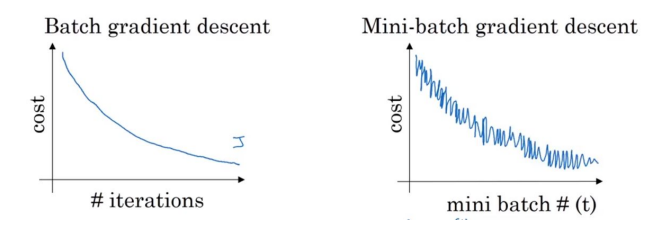

<br/>

### PyTorch Dataset

- torch.utils.data.Dataset을 상속한 모델
- \_\_len\_\_(): 이 데이터셋의 총 데이터 수
- \_\_getitem\_\_(): 어떤 인덱스 idx값을 받았을 때, 그에 상응하는 입출력 데이터 반환

In [2]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
dataset = CustomDataset()

<br/>

### PyTorch DataLoader

- torch.utils.data.DataLoader 사용
- batch_size = 2
    - 각 minibatch 의 크기
    - 통상적으로 2의 제곱수로 설정
- shuffle=True
    - Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈

In [3]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
)

<br/>

### Full Code with Dataset and DataLoader

- enumerate(dataloader)
    - minibatch 인덱스와 데이터를 받음
- len(dataloader)
    - 한 epoch당 minibatch 개수

In [11]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)
 
# 모델초기화
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

hypothesis = model(x_train)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 40915.601562
Epoch    0/20 Batch 2/3 Cost: 12920.576172
Epoch    0/20 Batch 3/3 Cost: 5065.413086
Epoch    1/20 Batch 1/3 Cost: 891.281982
Epoch    1/20 Batch 2/3 Cost: 561.250000
Epoch    1/20 Batch 3/3 Cost: 155.883240
Epoch    2/20 Batch 1/3 Cost: 32.231728
Epoch    2/20 Batch 2/3 Cost: 9.902433
Epoch    2/20 Batch 3/3 Cost: 1.506665
Epoch    3/20 Batch 1/3 Cost: 0.842225
Epoch    3/20 Batch 2/3 Cost: 3.997398
Epoch    3/20 Batch 3/3 Cost: 0.176258
Epoch    4/20 Batch 1/3 Cost: 0.104294
Epoch    4/20 Batch 2/3 Cost: 3.158727
Epoch    4/20 Batch 3/3 Cost: 0.533495
Epoch    5/20 Batch 1/3 Cost: 2.765604
Epoch    5/20 Batch 2/3 Cost: 0.253802
Epoch    5/20 Batch 3/3 Cost: 0.003346
Epoch    6/20 Batch 1/3 Cost: 2.466971
Epoch    6/20 Batch 2/3 Cost: 0.656598
Epoch    6/20 Batch 3/3 Cost: 0.003512
Epoch    7/20 Batch 1/3 Cost: 2.347433
Epoch    7/20 Batch 2/3 Cost: 0.856151
Epoch    7/20 Batch 3/3 Cost: 0.283265
Epoch    8/20 Batch 1/3 Cost: 2.793957
Epoch  